In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,  roc_auc_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("Datasets/kpandc1.csv")

In [7]:
df

,default_flag,disposition,sy_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_rade,pl_radeerr1,pl_radeerr2,...,radjpos,radpos,radneg,distpos,vmagpos,vmagneg,kmagpos,kmagneg,gaiamagpos,gaiamagneg
0,0,CONFIRMED,1,41.688644,0.003353,-0.003419,0,2.355454,0.310000,-0.166773,...,0.195261,1.054707,0.901447,178.2210,10.861,10.837,9.386,9.350,10.864649,10.864151
1,0,CONFIRMED,1,41.685500,0.003000,-0.003100,0,2.230000,0.140000,-0.110000,...,0.189134,0.983000,0.888000,178.2210,10.861,10.837,9.386,9.350,10.864649,10.864151
2,1,CONFIRMED,1,41.685500,0.003000,-0.003000,0,2.578070,0.112090,-0.112090,...,0.220000,1.140000,1.020000,178.2210,10.861,10.837,9.386,9.350,10.864649,10.864151
3,1,CANDIDATE,0,2.301830,0.000280,-0.000300,0,1.120000,0.110000,-0.080000,...,0.092900,0.816253,0.725017,96.7197,11.773,11.681,9.239,9.201,11.400807,11.398193
4,0,CANDIDATE,0,2.302368,0.000105,-0.000103,0,1.312588,0.524177,-0.120814,...,0.110000,0.729604,0.690597,96.7197,11.773,11.681,9.239,9.201,11.400807,11.398193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,0,CONFIRMED,1,2.655676,0.000002,-0.000002,0,11.100000,1.000000,-11.100000,...,0.000000,0.967000,0.000000,140.6790,10.730,10.710,8.759,8.707,10.625059,10.623141
4000,1,CONFIRMED,1,6.001270,0.000021,-0.000021,0,2.043000,0.069000,-0.069000,...,0.176109,0.710000,0.669000,44.4299,10.300,10.240,7.640,7.594,9.898497,9.897823
4001,0,CONFIRMED,1,6.001180,0.000080,-0.000110,0,2.030000,0.076000,-0.073000,...,0.174592,0.715000,0.666000,44.4299,10.300,10.240,7.640,7.594,9.898497,9.897823
4002,0,CONFIRMED,1,6.001270,0.000021,-0.000021,0,2.043000,0.069000,-0.069000,...,0.176109,0.710000,0.669000,44.4299,10.300,10.240,7.640,7.594,9.898497,9.897823


In [8]:
# Remove the 'default_flag' column from the DataFrame
df = df.drop(columns=["default_flag"])
df.head()

,disposition,sy_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,...,radjpos,radpos,radneg,distpos,vmagpos,vmagneg,kmagpos,kmagneg,gaiamagpos,gaiamagneg
0,CONFIRMED,1,41.688644,0.003353,-0.003419,0,2.355454,0.310000,-0.166773,0,...,0.195261,1.054707,0.901447,178.2210,10.861,10.837,9.386,9.350,10.864649,10.864151
1,CONFIRMED,1,41.685500,0.003000,-0.003100,0,2.230000,0.140000,-0.110000,0,...,0.189134,0.983000,0.888000,178.2210,10.861,10.837,9.386,9.350,10.864649,10.864151
2,CONFIRMED,1,41.685500,0.003000,-0.003000,0,2.578070,0.112090,-0.112090,0,...,0.220000,1.140000,1.020000,178.2210,10.861,10.837,9.386,9.350,10.864649,10.864151
3,CANDIDATE,0,2.301830,0.000280,-0.000300,0,1.120000,0.110000,-0.080000,0,...,0.092900,0.816253,0.725017,96.7197,11.773,11.681,9.239,9.201,11.400807,11.398193
4,CANDIDATE,0,2.302368,0.000105,-0.000103,0,1.312588,0.524177,-0.120814,0,...,0.110000,0.729604,0.690597,96.7197,11.773,11.681,9.239,9.201,11.400807,11.398193


In [11]:
df = df.drop(columns=["st_radlim"])
df.head()

,disposition,sy_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,...,radjpos,radpos,radneg,distpos,vmagpos,vmagneg,kmagpos,kmagneg,gaiamagpos,gaiamagneg
0,CONFIRMED,1,41.688644,0.003353,-0.003419,0,2.355454,0.310000,-0.166773,0,...,0.195261,1.054707,0.901447,178.2210,10.861,10.837,9.386,9.350,10.864649,10.864151
1,CONFIRMED,1,41.685500,0.003000,-0.003100,0,2.230000,0.140000,-0.110000,0,...,0.189134,0.983000,0.888000,178.2210,10.861,10.837,9.386,9.350,10.864649,10.864151
2,CONFIRMED,1,41.685500,0.003000,-0.003000,0,2.578070,0.112090,-0.112090,0,...,0.220000,1.140000,1.020000,178.2210,10.861,10.837,9.386,9.350,10.864649,10.864151
3,CANDIDATE,0,2.301830,0.000280,-0.000300,0,1.120000,0.110000,-0.080000,0,...,0.092900,0.816253,0.725017,96.7197,11.773,11.681,9.239,9.201,11.400807,11.398193
4,CANDIDATE,0,2.302368,0.000105,-0.000103,0,1.312588,0.524177,-0.120814,0,...,0.110000,0.729604,0.690597,96.7197,11.773,11.681,9.239,9.201,11.400807,11.398193


In [12]:
df.columns

Index(['disposition', 'sy_pnum', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2',
       'pl_orbperlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim',
       'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'st_rad',
       'st_raderr1', 'st_raderr2', 'sy_dist', 'sy_disterr1', 'sy_disterr2',
       'sy_vmag', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_kmag', 'sy_kmagerr1',
       'sy_kmagerr2', 'sy_gaiamag', 'sy_gaiamagerr1', 'sy_gaiamagerr2',
       'orbpos', 'orbneg', 'radepos', 'radjpos', 'radpos', 'radneg', 'distpos',
       'vmagpos', 'vmagneg', 'kmagpos', 'kmagneg', 'gaiamagpos', 'gaiamagneg'],
      dtype='object')

In [17]:
label_encoder = LabelEncoder()
df['disposition'] = label_encoder.fit_transform(df['disposition'])




In [10]:
# 2. Calcular la matriz de correlación (rango de -1 a 1)
matriz_correlacion = df.corr()
plt.figure(figsize=(50, 50))
# 4. Generar el Heatmap
sns.heatmap(
    matriz_correlacion,
    annot=True,        # Muestra el valor de correlación dentro de cada celda
    fmt=".2f",         # Formatea los números a 2 decimales
    cmap='coolwarm',   # Define el esquema de color (ej. 'viridis', 'YlGnBu')
    linewidths=.5,     # Añade líneas para separar las celdas
    cbar=True          # Muestra la barra de color lateral
)

# 5. Añadir título y mostrar el gráfico
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()

ValueError: could not convert string to float: 'CONFIRMED'

In [13]:
X = df[[  'sy_pnum', 'pl_orbper',
       'pl_orbperlim', 'pl_rade','pl_radelim',
       'pl_radj',  'pl_radjlim', 'st_rad',
        'sy_dist', 
       'sy_vmag',  'sy_kmag',  'sy_gaiamag', 
       'orbpos', 'orbneg', 'radepos', 'radjpos', 'radpos', 'radneg', 'distpos',
       'vmagpos', 'vmagneg', 'kmagpos', 'kmagneg', 'gaiamagpos', 'gaiamagneg']]
y = df["disposition"]

In [14]:
SEED  = 23
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = SEED)

In [15]:
gbc = GradientBoostingClassifier(n_estimators=500,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
                                 

In [16]:
gbc.fit(train_X, train_y)

pred_y = gbc.predict(test_X)

acc = accuracy_score(test_y, pred_y)

In [17]:
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))


Gradient Boosting Classifier accuracy is : 0.95


In [18]:
a =df["sy_pnum"].groupby(df["disposition"])
a.count()

disposition
CANDIDATE         1374
CONFIRMED         2315
FALSE POSITIVE     293
REFUTED             22
Name: sy_pnum, dtype: int64

                precision    recall  f1-score   support

     CANDIDATE       0.89      0.97      0.93       261
     CONFIRMED       0.99      1.00      0.99       476
FALSE POSITIVE       0.88      0.49      0.63        61
       REFUTED       1.00      1.00      1.00         3

      accuracy                           0.95       801
     macro avg       0.94      0.86      0.89       801
  weighted avg       0.95      0.95      0.94       801



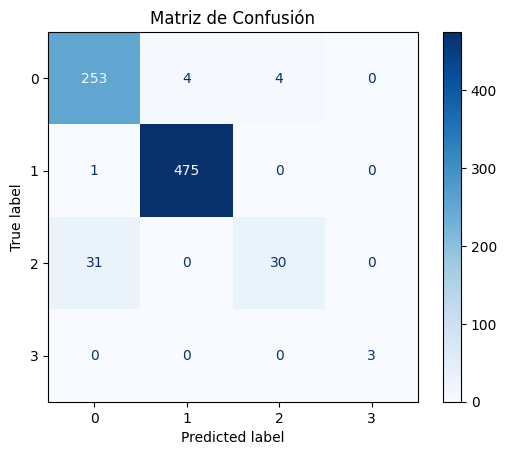

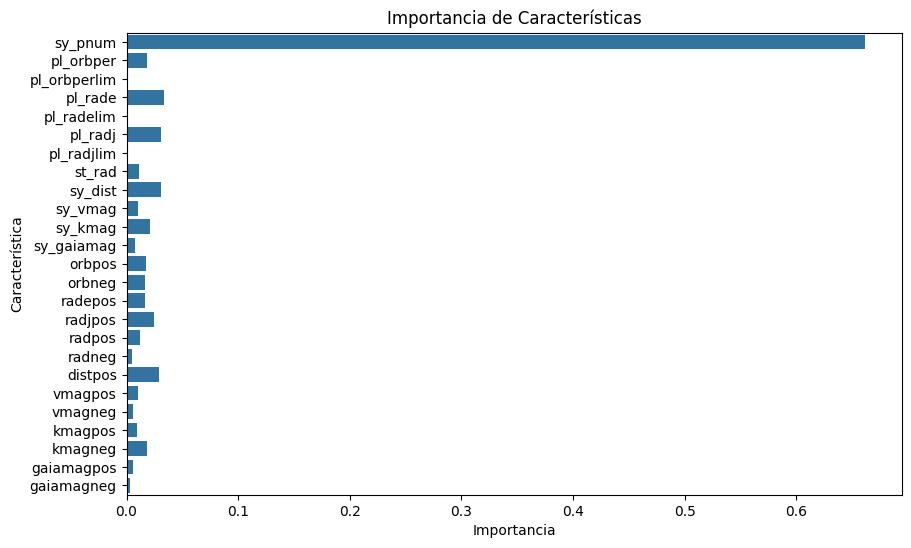

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Mostrar el reporte de clasificación
print(classification_report(test_y, pred_y))

# Matriz de confusión
cmp = confusion_matrix(test_y, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cmp)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

# Si quieres ver la importancia de las características:
importances = gbc.feature_importances_
features = train_X.columns
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title('Importancia de Características')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

In [20]:
import joblib

# Save the trained model to a file
joblib.dump(gbc, 'gradient_boosting_model.pkl')
print('Model saved as gradient_boosting_model.pkl')

Model saved as gradient_boosting_model.pkl
